In [1]:
import pandas as pd
import servicex as sx
import awkward as ak
from func_adl_servicex import ServiceXSourceUpROOT
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200 # make figures bigger and more readable

In [2]:
dataset_name = ["root://eospublic.cern.ch//eos/root-eos/benchmark/Run2012B_SingleMu.root"]
sx_dataset = sx.ServiceXDataset(dataset_name, "uproot")
ds = ServiceXSourceUpROOT(sx_dataset, "Events")


filtered_jet_pT = ds.SelectMany(lambda event: {'pT': event.Jet_pt, 'eta': event.Jet_eta}.Zip()
                                              .Where(lambda jet: abs(jet.eta) < 1)
                                              .Select(lambda jet: jet.pT)).AsAwkwardArray().value()

cms:DYJetsToLL_M-50_...:   0%|          | 0/9000000000.0 [00:00]

        cms:DYJetsToLL_M-50_... Downloaded:   0%|          | 0/9000000000.0 [00:00]

In [3]:
jet_pT

<Array [[156, 104, 50.5, ... 17.8, 17.2, 16.5]] type='193119590 * var * float32'>

ValueError: in ListOffsetArray64, cannot convert to RegularArray because subarray lengths are not regular

(https://github.com/scikit-hep/awkward-1.0/blob/1.5.0/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

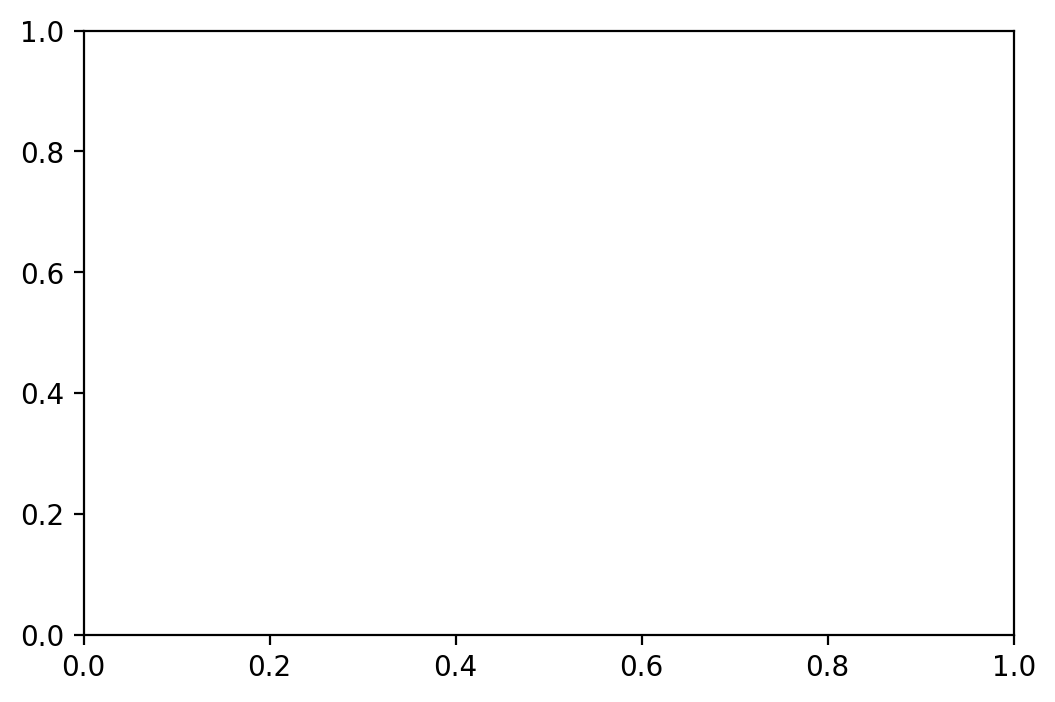

In [4]:
plt.hist([filtered_jet_pT], bins=100, range=(0, 100))
plt.xlabel(r'$p_\mathrm{T}$ [GeV]')
plt.ylabel('Jets')
plt.show()